# Run stats and plot figures

##### This is the notebook I used to generate all figures and perform all statistical testing included in the manuscript. Figures were exported to pdf and the colours were altered a little, but that's about it.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as ols
from statsmodels.stats.multitest import multipletests

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### fig 1e

In [2]:
fig1e_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='1e')
fig1e_df

,strain,rate
0,BW25113_565_naive,0.940271
1,BW25113_565_naive,1.097018
2,BW25113_565_naive,0.962712
3,BW25113_565_naive,1.276008
4,BW25113_565_naive,0.982291
5,BW25113_565_naive,0.741700
6,pcnB_565_naive,0.446109
7,pcnB_565_naive,0.387474
8,pcnB_565_naive,0.485639
9,pcnB_565_naive,0.724665


In [3]:
data = []
for i in set(fig1e_df['strain']):
    print (i)
    data.append(fig1e_df[fig1e_df['strain']==i]['rate'])

uraA_565_naive
yeaO_565_naive
sspA_565_naive
osmF_565_naive
BW25113_565_naive
rclR_565_naive
pcnB_565_naive
b66_565_naive
ompC_565_naive


/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/slopez/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


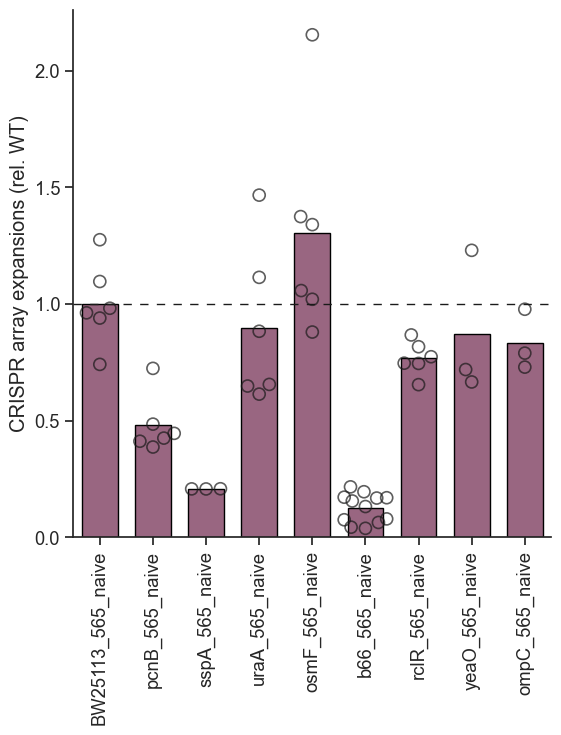

In [4]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="strain", y='rate',
                data=fig1e_df, dodge = True, height= 6.27, aspect=1,
                kind="swarm", fc='none', edgecolor='k',linewidth=1.2, 
                s=75, alpha = 0.7, legend = False)

sns.barplot(x="strain", y='rate',
            data=fig1e_df,color = sns.color_palette("ch:s=-.2,r=.6", 10)[5], 
            edgecolor='black', width = 0.45, gap = -.5, errorbar=None)

g.set(xlabel='', ylabel='CRISPR array expansions (rel. WT)')

g.set_xticklabels(rotation=90)

plt.axhline(1, color = 'k', dashes = (6,6), lw = 1)

g.savefig("1e.pdf")

In [5]:
lm=ols.ols("rate ~ strain", fig1e_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,8.0,8.045060,1.005633,19.61357,6.755095e-12
Residual,42.0,2.153436,0.051272,NaN,NaN


In [6]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
b66_565_naive-BW25113_565_naive,-0.873748,0.113217,-7.717467,1.393235e-09,-1.102229,-0.645267,5.015648e-08,True
ompC_565_naive-BW25113_565_naive,-0.167335,0.160113,-1.045109,3.019506e-01,-0.490456,0.155786,9.999976e-01,False
osmF_565_naive-BW25113_565_naive,0.304948,0.130732,2.332630,2.453318e-02,0.041121,0.568776,5.910689e-01,False
pcnB_565_naive-BW25113_565_naive,-0.519667,0.130732,-3.975069,2.714492e-04,-0.783494,-0.255840,9.725892e-03,True
rclR_565_naive-BW25113_565_naive,-0.232126,0.130732,-1.775595,8.304590e-02,-0.495954,0.031701,9.558924e-01,False
sspA_565_naive-BW25113_565_naive,-0.791846,0.160113,-4.945547,1.270192e-05,-1.114967,-0.468725,4.571676e-04,True
uraA_565_naive-BW25113_565_naive,-0.102545,0.130732,-0.784395,4.372102e-01,-0.366372,0.161282,1.000000e+00,False
yeaO_565_naive-BW25113_565_naive,-0.127819,0.160113,-0.798308,4.291828e-01,-0.450940,0.195302,1.000000e+00,False
ompC_565_naive-b66_565_naive,0.706412,0.146162,4.833065,1.827119e-05,0.411445,1.001380,6.575525e-04,True
osmF_565_naive-b66_565_naive,1.178696,0.113217,10.410955,3.325505e-13,0.950215,1.407177,1.197182e-11,True


In [7]:
pw.result_frame.index

Index(['b66_565_naive-BW25113_565_naive', 'ompC_565_naive-BW25113_565_naive',
       'osmF_565_naive-BW25113_565_naive', 'pcnB_565_naive-BW25113_565_naive',
       'rclR_565_naive-BW25113_565_naive', 'sspA_565_naive-BW25113_565_naive',
       'uraA_565_naive-BW25113_565_naive', 'yeaO_565_naive-BW25113_565_naive',
       'ompC_565_naive-b66_565_naive', 'osmF_565_naive-b66_565_naive',
       'pcnB_565_naive-b66_565_naive', 'rclR_565_naive-b66_565_naive',
       'sspA_565_naive-b66_565_naive', 'uraA_565_naive-b66_565_naive',
       'yeaO_565_naive-b66_565_naive', 'osmF_565_naive-ompC_565_naive',
       'pcnB_565_naive-ompC_565_naive', 'rclR_565_naive-ompC_565_naive',
       'sspA_565_naive-ompC_565_naive', 'uraA_565_naive-ompC_565_naive',
       'yeaO_565_naive-ompC_565_naive', 'pcnB_565_naive-osmF_565_naive',
       'rclR_565_naive-osmF_565_naive', 'sspA_565_naive-osmF_565_naive',
       'uraA_565_naive-osmF_565_naive', 'yeaO_565_naive-osmF_565_naive',
       'rclR_565_naive-pcnB_565_nai

In [8]:
comparisons = ['b66_565_naive-BW25113_565_naive', 'ompC_565_naive-BW25113_565_naive',
       'osmF_565_naive-BW25113_565_naive', 'pcnB_565_naive-BW25113_565_naive',
       'rclR_565_naive-BW25113_565_naive', 'sspA_565_naive-BW25113_565_naive',
       'uraA_565_naive-BW25113_565_naive', 'yeaO_565_naive-BW25113_565_naive']

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
display(subdf)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
b66_565_naive-BW25113_565_naive,-0.873748,0.113217,-7.717467,1.393235e-09,-1.102229,-0.645267,5.015648e-08,True,0.000000
ompC_565_naive-BW25113_565_naive,-0.167335,0.160113,-1.045109,3.019506e-01,-0.490456,0.155786,9.999976e-01,False,0.943625
osmF_565_naive-BW25113_565_naive,0.304948,0.130732,2.332630,2.453318e-02,0.041121,0.568776,5.910689e-01,False,0.180215
pcnB_565_naive-BW25113_565_naive,-0.519667,0.130732,-3.975069,2.714492e-04,-0.783494,-0.255840,9.725892e-03,True,0.002170
rclR_565_naive-BW25113_565_naive,-0.232126,0.130732,-1.775595,8.304590e-02,-0.495954,0.031701,9.558924e-01,False,0.500218
sspA_565_naive-BW25113_565_naive,-0.791846,0.160113,-4.945547,1.270192e-05,-1.114967,-0.468725,4.571676e-04,True,0.000102
uraA_565_naive-BW25113_565_naive,-0.102545,0.130732,-0.784395,4.372102e-01,-0.366372,0.161282,1.000000e+00,False,0.989936
yeaO_565_naive-BW25113_565_naive,-0.127819,0.160113,-0.798308,4.291828e-01,-0.450940,0.195302,1.000000e+00,False,0.988729


### fig2i

In [9]:
qpcr_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='2i')
qpcr_df

,sample_target,fc
0,WT_CDF,6.543365
1,WT_CDF,6.558686
2,WT_CDF,6.409186
3,WT_cas1,6.477383
4,WT_cas1,7.162387
5,WT_cas1,6.251488
6,A_CDF,-0.833683
7,A_CDF,-0.755894
8,A_CDF,-1.002582
9,A_cas1,0.153715


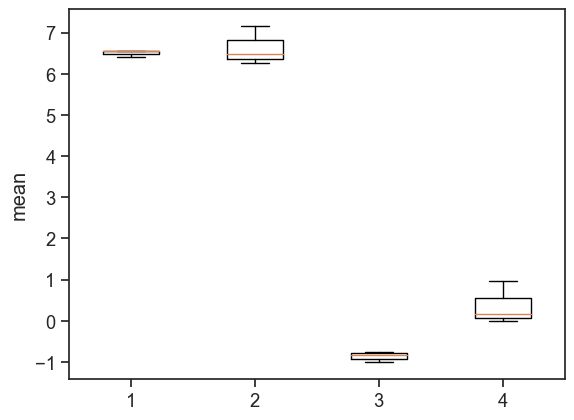

In [10]:
fig, ax = plt.subplots(1, 1)
data = [
    qpcr_df[qpcr_df['sample_target']=='WT_CDF']['fc'],
    qpcr_df[qpcr_df['sample_target']=='WT_cas1']['fc'],
    qpcr_df[qpcr_df['sample_target']=='A_CDF']['fc'],
    qpcr_df[qpcr_df['sample_target']=='A_cas1']['fc'],
       ]
ax.boxplot(data)
ax.set_ylabel("mean") 
plt.show()

### evaluate ANOVA

In [11]:
lm=ols.ols("fc ~ sample_target", qpcr_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
sample_target,3.0,141.535768,47.178589,359.84712,7.184486e-09
Residual,8.0,1.048859,0.131107,NaN,NaN


### if significant, do multiple comparisons, Sidak corrected 

In [12]:
pw = lm.t_test_pairwise("sample_target",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
A_cas1-A_CDF,1.238170,0.295643,4.188055,3.045855e-03,0.556415,1.919924,1.813654e-02,True
WT_CDF-A_CDF,7.367799,0.295643,24.921256,7.188631e-09,6.686044,8.049553,4.313178e-08,True
WT_cas1-A_CDF,7.494472,0.295643,25.349724,6.281834e-09,6.812718,8.176227,3.769100e-08,True
WT_CDF-A_cas1,6.129629,0.295643,20.733201,3.069400e-08,5.447875,6.811383,1.841640e-07,True
WT_cas1-A_cas1,6.256303,0.295643,21.161669,2.612948e-08,5.574548,6.938057,1.567769e-07,True
WT_cas1-WT_CDF,0.126674,0.295643,0.428468,6.796132e-01,-0.555081,0.808428,9.989184e-01,False


In [13]:
comparisons = ['WT_CDF-A_CDF', 'WT_cas1-A_cas1', 'WT_cas1-WT_CDF', 'A_cas1-A_CDF']

In [14]:
subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(4)
subdf

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
WT_CDF-A_CDF,7.367799,0.295643,24.921256,7.188631e-09,6.686044,8.049553,4.313178e-08,True,0.0000
WT_cas1-A_cas1,6.256303,0.295643,21.161669,2.612948e-08,5.574548,6.938057,1.567769e-07,True,0.0000
WT_cas1-WT_CDF,0.126674,0.295643,0.428468,6.796132e-01,-0.555081,0.808428,9.989184e-01,False,0.9895
A_cas1-A_CDF,1.238170,0.295643,4.188055,3.045855e-03,0.556415,1.919924,1.813654e-02,True,0.0121


### fig 3c

In [15]:
fig3c_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='3c')
fig3c_df

,strain,rate
0,BW25113_565_naive,0.897944
1,BW25113_565_naive,0.940167
2,BW25113_565_naive,1.161889
3,∆ihfA +565,0.008193
4,∆ihfA +565,0.005090
5,∆ihfA +565,0.046717
6,∆sspB +565,0.859191
7,∆sspB +565,0.891905
8,∆sspB +565,0.987830
9,∆sspB +565,0.901444


In [16]:
data = []
for i in set(fig3c_df['strain']):
    print (i)
    data.append(fig3c_df[fig3c_df['strain']==i]['rate'])

∆ihfA +565
∆sspA +565_+735
∆sspA +565
∆sspB +565
BW25113_565_naive


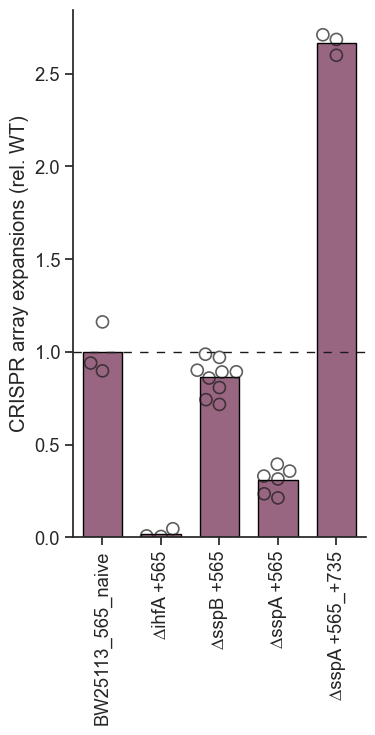

In [17]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="strain", y='rate',
                data=fig3c_df, dodge = True, height= 6.27, aspect=0.7, 
                kind="swarm", fc='none', edgecolor='k',linewidth=1.2, s=75, alpha = 0.7,
                legend = False)

sns.barplot(x="strain", y='rate',
            data=fig3c_df,color = sns.color_palette("ch:s=-.2,r=.6", 10)[5], 
            edgecolor='black', width = 0.45, gap = -.5, errorbar=None)

g.set(xlabel='', ylabel='CRISPR array expansions (rel. WT)')

g.set_xticklabels(rotation=90)

plt.axhline(1, color = 'k', dashes = (6,6), lw = 1)

g.savefig("3c.pdf")

In [18]:
lm=ols.ols("rate ~ strain", fig3c_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,4.0,13.774071,3.443518,460.830381,1.258351e-18
Residual,19.0,0.141976,0.007472,NaN,NaN


In [19]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
∆ihfA +565-BW25113_565_naive,-0.980000,0.070581,-13.884848,2.124818e-11,-1.127727,-0.832273,2.124818e-10,True
∆sspA +565-BW25113_565_naive,-0.692251,0.061125,-11.325255,6.841413e-10,-0.820186,-0.564316,6.841413e-09,True
∆sspA +565_+735-BW25113_565_naive,1.664486,0.070581,23.582793,1.562047e-15,1.516760,1.812213,1.562047e-14,True
∆sspB +565-BW25113_565_naive,-0.136450,0.057629,-2.367747,2.866049e-02,-0.257069,-0.015832,2.523290e-01,False
∆sspA +565-∆ihfA +565,0.287749,0.061125,4.707586,1.532756e-04,0.159814,0.415684,1.531700e-03,True
∆sspA +565_+735-∆ihfA +565,2.644486,0.070581,37.467641,2.836050e-19,2.496760,2.792213,2.836050e-18,True
∆sspB +565-∆ihfA +565,0.843550,0.057629,14.637650,8.455649e-12,0.722931,0.964168,8.455649e-11,True
∆sspA +565_+735-∆sspA +565,2.356737,0.061125,38.556319,1.656881e-19,2.228802,2.484672,1.656881e-18,True
∆sspB +565-∆sspA +565,0.555801,0.045560,12.199435,1.960323e-10,0.460443,0.651158,1.960323e-09,True
∆sspB +565-∆sspA +565_+735,-1.800937,0.057629,-31.250652,8.452270e-18,-1.921555,-1.680318,8.452270e-17,True


In [20]:
pw.result_frame.index

Index(['∆ihfA +565-BW25113_565_naive', '∆sspA +565-BW25113_565_naive',
       '∆sspA +565_+735-BW25113_565_naive', '∆sspB +565-BW25113_565_naive',
       '∆sspA +565-∆ihfA +565', '∆sspA +565_+735-∆ihfA +565',
       '∆sspB +565-∆ihfA +565', '∆sspA +565_+735-∆sspA +565',
       '∆sspB +565-∆sspA +565', '∆sspB +565-∆sspA +565_+735'],
      dtype='object')

In [21]:
comparisons = ['∆sspA +565-BW25113_565_naive',
               '∆sspA +565_+735-BW25113_565_naive', 
               '∆sspB +565-BW25113_565_naive',
               '∆sspB +565-∆sspA +565'
               ]

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
display(subdf)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
∆sspA +565-BW25113_565_naive,-0.692251,0.061125,-11.325255,6.841413e-10,-0.820186,-0.564316,6.841413e-09,True,0.000000
∆sspA +565_+735-BW25113_565_naive,1.664486,0.070581,23.582793,1.562047e-15,1.516760,1.812213,1.562047e-14,True,0.000000
∆sspB +565-BW25113_565_naive,-0.136450,0.057629,-2.367747,2.866049e-02,-0.257069,-0.015832,2.523290e-01,False,0.109807
∆sspB +565-∆sspA +565,0.555801,0.045560,12.199435,1.960323e-10,0.460443,0.651158,1.960323e-09,True,0.000000


### fig 3e

In [22]:
fig3e_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='3e')
fig3e_df

,strain,rate
0,BW25113_565_naive,1.027009
1,BW25113_565_naive,0.961419
2,BW25113_565_naive,1.011572
3,BW25113_565_naive,0.774699
4,BW25113_565_naive,1.167275
5,BW25113_565_naive,1.058026
6,sspA_565_naive,0.198646
7,sspA_565_naive,0.147236
8,sspA_565_naive,0.151659
9,sspA_+565+754_naive,0.297275


In [23]:
data = []
for i in set(fig3e_df['strain']):
    print (i)
    data.append(fig3e_df[fig3e_df['strain']==i]['rate'])

sspA_+565+754_naive
sspA_565+748_naive
sspA_565+735_naive
sspA_565_naive
BW25113_565_naive
sspA_565+752_naive
sspA_565+753_naive
sspA_565+770_naive
sspA_565+751_naive


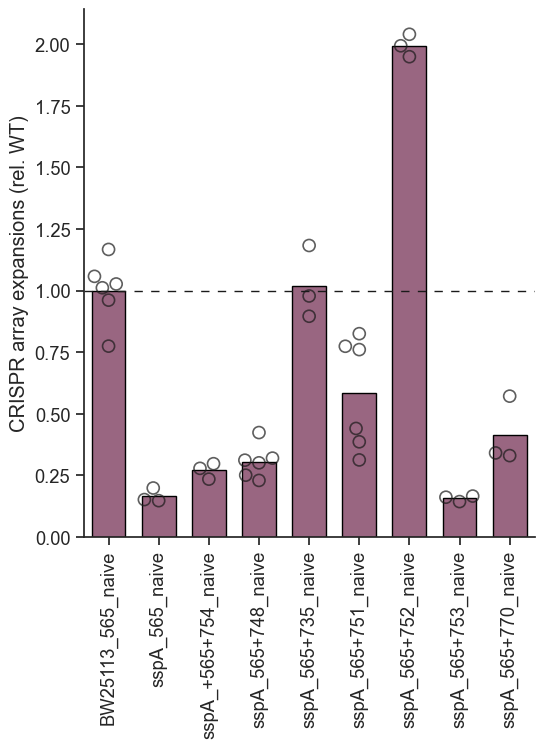

In [24]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="strain", y='rate',
                data=fig3e_df, dodge = True, height= 6.27, aspect=1, 
                kind="swarm", fc='none', edgecolor='k',linewidth=1.2, s=75, alpha = 0.7,
                legend = False)

sns.barplot(x="strain", y='rate',
            data=fig3e_df,color = sns.color_palette("ch:s=-.2,r=.6", 10)[5], 
            edgecolor='black', width = 0.45, gap = -.5, errorbar=None)

g.set(xlabel='', ylabel='CRISPR array expansions (rel. WT)')

g.set_xticklabels(rotation=90)

plt.axhline(1, color = 'k', dashes = (6,6), lw = 1)

g.savefig("3e.pdf")

In [25]:
lm=ols.ols("rate ~ strain", fig3e_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,8.0,9.338813,1.167352,69.206933,5.544901e-16
Residual,27.0,0.455424,0.016868,NaN,NaN


In [26]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
sspA_+565+754_naive-BW25113_565_naive,-0.729874,0.091836,-7.947610,1.526696e-08,-0.918305,-0.541442,5.496104e-07,True
sspA_565+735_naive-BW25113_565_naive,0.019174,0.091836,0.208790,8.361796e-01,-0.169257,0.207605,1.000000e+00,False
sspA_565+748_naive-BW25113_565_naive,-0.693931,0.074983,-9.254456,7.285125e-10,-0.847784,-0.540078,2.622645e-08,True
sspA_565+751_naive-BW25113_565_naive,-0.416785,0.074983,-5.558364,6.824176e-06,-0.570639,-0.262932,2.456410e-04,True
sspA_565+752_naive-BW25113_565_naive,0.994884,0.091836,10.833314,2.481225e-11,0.806453,1.183315,8.932410e-10,True
sspA_565+753_naive-BW25113_565_naive,-0.843116,0.091836,-9.180708,8.597966e-10,-1.031547,-0.654685,3.095268e-08,True
sspA_565+770_naive-BW25113_565_naive,-0.585726,0.091836,-6.377980,7.863834e-07,-0.774157,-0.397295,2.830941e-05,True
sspA_565_naive-BW25113_565_naive,-0.834153,0.091836,-9.083111,1.071771e-09,-1.022584,-0.645722,3.858375e-08,True
sspA_565+735_naive-sspA_+565+754_naive,0.749048,0.106043,7.063650,1.355668e-07,0.531466,0.966629,4.880392e-06,True
sspA_565+748_naive-sspA_+565+754_naive,0.035942,0.091836,0.391379,6.985891e-01,-0.152489,0.224374,1.000000e+00,False


In [27]:
pw.result_frame.index

Index(['sspA_+565+754_naive-BW25113_565_naive',
       'sspA_565+735_naive-BW25113_565_naive',
       'sspA_565+748_naive-BW25113_565_naive',
       'sspA_565+751_naive-BW25113_565_naive',
       'sspA_565+752_naive-BW25113_565_naive',
       'sspA_565+753_naive-BW25113_565_naive',
       'sspA_565+770_naive-BW25113_565_naive',
       'sspA_565_naive-BW25113_565_naive',
       'sspA_565+735_naive-sspA_+565+754_naive',
       'sspA_565+748_naive-sspA_+565+754_naive',
       'sspA_565+751_naive-sspA_+565+754_naive',
       'sspA_565+752_naive-sspA_+565+754_naive',
       'sspA_565+753_naive-sspA_+565+754_naive',
       'sspA_565+770_naive-sspA_+565+754_naive',
       'sspA_565_naive-sspA_+565+754_naive',
       'sspA_565+748_naive-sspA_565+735_naive',
       'sspA_565+751_naive-sspA_565+735_naive',
       'sspA_565+752_naive-sspA_565+735_naive',
       'sspA_565+753_naive-sspA_565+735_naive',
       'sspA_565+770_naive-sspA_565+735_naive',
       'sspA_565_naive-sspA_565+735_naive',
    

In [28]:
comparisons = ['sspA_+565+754_naive-BW25113_565_naive',
               'sspA_565+735_naive-BW25113_565_naive',
               'sspA_565+748_naive-BW25113_565_naive',
               'sspA_565+751_naive-BW25113_565_naive',
               'sspA_565+752_naive-BW25113_565_naive',
               'sspA_565+753_naive-BW25113_565_naive',
               'sspA_565+770_naive-BW25113_565_naive',
               'sspA_565_naive-BW25113_565_naive',
               
               'sspA_565_naive-sspA_565+735_naive',
               'sspA_565_naive-sspA_565+748_naive',
               'sspA_565_naive-sspA_565+751_naive',
               'sspA_565_naive-sspA_565+752_naive',
               'sspA_565_naive-sspA_565+753_naive',
               'sspA_565_naive-sspA_+565+754_naive',
               'sspA_565_naive-sspA_565+770_naive'
                       ]

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
display(subdf)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
sspA_+565+754_naive-BW25113_565_naive,-0.729874,0.091836,-7.947610,1.526696e-08,-0.918305,-0.541442,5.496104e-07,True,0.000000
sspA_565+735_naive-BW25113_565_naive,0.019174,0.091836,0.208790,8.361796e-01,-0.169257,0.207605,1.000000e+00,False,1.000000
sspA_565+748_naive-BW25113_565_naive,-0.693931,0.074983,-9.254456,7.285125e-10,-0.847784,-0.540078,2.622645e-08,True,0.000000
sspA_565+751_naive-BW25113_565_naive,-0.416785,0.074983,-5.558364,6.824176e-06,-0.570639,-0.262932,2.456410e-04,True,0.000102
sspA_565+752_naive-BW25113_565_naive,0.994884,0.091836,10.833314,2.481225e-11,0.806453,1.183315,8.932410e-10,True,0.000000
sspA_565+753_naive-BW25113_565_naive,-0.843116,0.091836,-9.180708,8.597966e-10,-1.031547,-0.654685,3.095268e-08,True,0.000000
sspA_565+770_naive-BW25113_565_naive,-0.585726,0.091836,-6.377980,7.863834e-07,-0.774157,-0.397295,2.830941e-05,True,0.000012
sspA_565_naive-BW25113_565_naive,-0.834153,0.091836,-9.083111,1.071771e-09,-1.022584,-0.645722,3.858375e-08,True,0.000000
sspA_565_naive-sspA_565+735_naive,-0.853327,0.106043,-8.047022,1.201725e-08,-1.070909,-0.635746,4.326210e-07,True,0.000000
sspA_565_naive-sspA_565+748_naive,-0.140222,0.091836,-1.526879,1.384219e-01,-0.328653,0.048209,9.953161e-01,False,0.892991


### fig4e

In [29]:
eop_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='4e')
eop_df

,strain,EOP
0,WT,0.847826
1,WT,2.625000
2,WT,0.849673
3,∆sspA,0.606557
4,∆sspA,0.062542
5,∆sspA,0.605911
6,∆hns,0.000010
7,∆hns,0.000050
8,∆hns,0.000010
9,∆sspA∆hns,0.000007


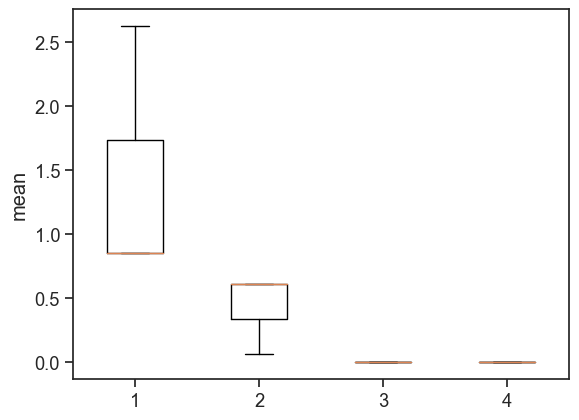

In [30]:
fig, ax = plt.subplots(1, 1)
data = [
    eop_df[eop_df['strain']=='WT']['EOP'],
    eop_df[eop_df['strain']=='∆sspA']['EOP'],
    eop_df[eop_df['strain']=='∆hns']['EOP'],
    eop_df[eop_df['strain']=='∆sspA∆hns']['EOP'],
       ]
ax.boxplot(data)
ax.set_ylabel("mean") 
plt.show()

In [31]:
lm=ols.ols("EOP ~ strain", eop_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,3.0,4.158796,1.386265,4.820857,0.033454
Residual,8.0,2.300447,0.287556,NaN,NaN


In [32]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
∆hns-WT,-1.440810,0.43784,-3.290722,0.011010,-2.450471,-0.431149,0.064269,False
∆sspA-WT,-1.015830,0.43784,-2.320093,0.048912,-2.025491,-0.006169,0.259844,False
∆sspA∆hns-WT,-1.440829,0.43784,-3.290765,0.011009,-2.450489,-0.431168,0.064265,False
∆sspA-∆hns,0.424980,0.43784,0.970629,0.360160,-0.584681,1.434641,0.931384,False
∆sspA∆hns-∆hns,-0.000019,0.43784,-0.000043,0.999967,-1.009680,1.009642,1.000000,False
∆sspA∆hns-∆sspA,-0.424999,0.43784,-0.970672,0.360140,-1.434660,0.584662,0.931371,False


In [33]:
comparisons = ['∆hns-WT', '∆sspA-WT', '∆sspA∆hns-WT', '∆sspA∆hns-∆hns']

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
subdf

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
∆hns-WT,-1.440810,0.43784,-3.290722,0.011010,-2.450471,-0.431149,0.064269,False,0.043319
∆sspA-WT,-1.015830,0.43784,-2.320093,0.048912,-2.025491,-0.006169,0.259844,False,0.181757
∆sspA∆hns-WT,-1.440829,0.43784,-3.290765,0.011009,-2.450489,-0.431168,0.064265,False,0.043316
∆sspA∆hns-∆hns,-0.000019,0.43784,-0.000043,0.999967,-1.009680,1.009642,1.000000,False,1.000000


### fig 5a

In [34]:
fig5a_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='5a')
fig5a_df

,strain,rate
0,BW25113_787_lambda,0.004404
1,BW25113_787_lambda,0.024317
2,BW25113_787_lambda,0.010954
3,BW25113_788_lambda,0.010481
4,BW25113_788_lambda,0.020413
5,BW25113_788_lambda,0.022500
6,b41_787_lambda,0.045272
7,b41_787_lambda,0.036870
8,b41_787_lambda,0.041765
9,b41_788_lambda,0.020400


In [35]:
data = []
for i in set(fig5a_df['strain']):
    print (i)
    data.append(fig5a_df[fig5a_df['strain']==i]['rate'])

b53_788_lambda
b53_787_lambda
b41_788_lambda
BW25113_787_lambda
BW25113_788_lambda
b51_787_lambda
b51_788_lambda
b41_787_lambda


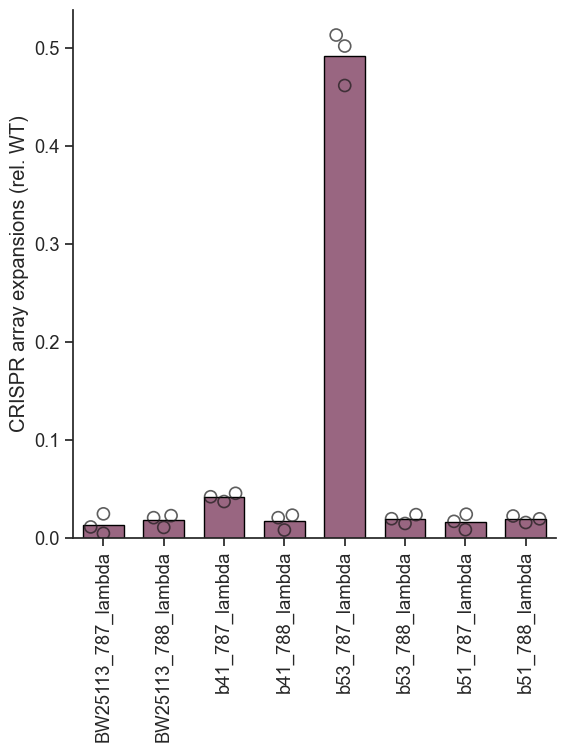

In [36]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="strain", y='rate',
                data=fig5a_df, dodge = True, height= 6.27, aspect=1, 
                kind="swarm", fc='none', edgecolor='k',linewidth=1.2, s=75, alpha = 0.7,
                legend = False)

sns.barplot(x="strain", y='rate', data=fig5a_df, 
            color = sns.color_palette("ch:s=-.2,r=.6", 10)[5], 
            edgecolor='black', width = 0.45, gap = -.5, errorbar=None)

g.set(xlabel='', ylabel='CRISPR array expansions (rel. WT)')

g.set_xticklabels(rotation=90)

g.savefig("5a.pdf")

In [37]:
lm=ols.ols("rate ~ strain", fig5a_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,7.0,0.584901,0.083557,633.590503,2.455554e-18
Residual,16.0,0.002110,0.000132,NaN,NaN


In [38]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
BW25113_788_lambda-BW25113_787_lambda,0.004573,0.009377,0.487706,6.323732e-01,-0.015304,0.024450,1.000000e+00,False
b41_787_lambda-BW25113_787_lambda,0.028077,0.009377,2.994406,8.579018e-03,0.008200,0.047955,2.143539e-01,False
b41_788_lambda-BW25113_787_lambda,0.003834,0.009377,0.408845,6.880733e-01,-0.016044,0.023711,1.000000e+00,False
b51_787_lambda-BW25113_787_lambda,0.003015,0.009377,0.321563,7.519467e-01,-0.016862,0.022893,1.000000e+00,False
b51_788_lambda-BW25113_787_lambda,0.005714,0.009377,0.609427,5.507981e-01,-0.014163,0.025592,1.000000e+00,False
b53_787_lambda-BW25113_787_lambda,0.478699,0.009377,51.052864,3.781418e-19,0.458821,0.498576,1.058797e-17,True
b53_788_lambda-BW25113_787_lambda,0.005887,0.009377,0.627835,5.389704e-01,-0.013990,0.025764,1.000000e+00,False
b41_787_lambda-BW25113_788_lambda,0.023504,0.009377,2.506700,2.335717e-02,0.003627,0.043382,4.840573e-01,False
b41_788_lambda-BW25113_788_lambda,-0.000739,0.009377,-0.078861,9.381211e-01,-0.020617,0.019138,1.000000e+00,False
b51_787_lambda-BW25113_788_lambda,-0.001558,0.009377,-0.166144,8.701252e-01,-0.021435,0.018320,1.000000e+00,False


In [39]:
pw.result_frame.index

Index(['BW25113_788_lambda-BW25113_787_lambda',
       'b41_787_lambda-BW25113_787_lambda',
       'b41_788_lambda-BW25113_787_lambda',
       'b51_787_lambda-BW25113_787_lambda',
       'b51_788_lambda-BW25113_787_lambda',
       'b53_787_lambda-BW25113_787_lambda',
       'b53_788_lambda-BW25113_787_lambda',
       'b41_787_lambda-BW25113_788_lambda',
       'b41_788_lambda-BW25113_788_lambda',
       'b51_787_lambda-BW25113_788_lambda',
       'b51_788_lambda-BW25113_788_lambda',
       'b53_787_lambda-BW25113_788_lambda',
       'b53_788_lambda-BW25113_788_lambda', 'b41_788_lambda-b41_787_lambda',
       'b51_787_lambda-b41_787_lambda', 'b51_788_lambda-b41_787_lambda',
       'b53_787_lambda-b41_787_lambda', 'b53_788_lambda-b41_787_lambda',
       'b51_787_lambda-b41_788_lambda', 'b51_788_lambda-b41_788_lambda',
       'b53_787_lambda-b41_788_lambda', 'b53_788_lambda-b41_788_lambda',
       'b51_788_lambda-b51_787_lambda', 'b53_787_lambda-b51_787_lambda',
       'b53_788_lambda-b51

In [40]:
comparisons = ['BW25113_788_lambda-BW25113_787_lambda',
               'b41_787_lambda-BW25113_787_lambda',
               'b51_787_lambda-BW25113_787_lambda',
               'b53_787_lambda-BW25113_787_lambda',
               
               'b41_788_lambda-b41_787_lambda',
               'b51_787_lambda-b41_787_lambda',
               'b53_787_lambda-b41_787_lambda', 
                              
               'b51_788_lambda-b51_787_lambda', 
               'b53_787_lambda-b51_787_lambda',
               'b53_788_lambda-b53_787_lambda']

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
display(subdf)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
BW25113_788_lambda-BW25113_787_lambda,0.004573,0.009377,0.487706,6.323732e-01,-0.015304,0.024450,1.000000e+00,False,0.999955
b41_787_lambda-BW25113_787_lambda,0.028077,0.009377,2.994406,8.579018e-03,0.008200,0.047955,2.143539e-01,False,0.082553
b51_787_lambda-BW25113_787_lambda,0.003015,0.009377,0.321563,7.519467e-01,-0.016862,0.022893,1.000000e+00,False,0.999999
b53_787_lambda-BW25113_787_lambda,0.478699,0.009377,51.052864,3.781418e-19,0.458821,0.498576,1.058797e-17,True,0.000000
b41_788_lambda-b41_787_lambda,-0.024244,0.009377,-2.585560,1.991607e-02,-0.044121,-0.004366,4.306603e-01,False,0.182227
b51_787_lambda-b41_787_lambda,-0.025062,0.009377,-2.672843,1.667311e-02,-0.044939,-0.005185,3.754868e-01,False,0.154762
b53_787_lambda-b41_787_lambda,0.450622,0.009377,48.058458,9.887521e-19,0.430744,0.470499,2.768506e-17,True,0.000000
b51_788_lambda-b51_787_lambda,0.002699,0.009377,0.287865,7.771457e-01,-0.017178,0.022577,1.000000e+00,False,1.000000
b53_787_lambda-b51_787_lambda,0.475684,0.009377,50.731301,4.181246e-19,0.455806,0.495561,1.170749e-17,True,0.000000
b53_788_lambda-b53_787_lambda,-0.472812,0.009377,-50.425029,4.604010e-19,-0.492689,-0.452935,1.289123e-17,True,0.000000


### fig 5g

In [41]:
fig5g_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='5g')
fig5g_df

,strain,rate
0,BW25113_565_naive,1.041640
1,BW25113_565_naive,0.959664
2,BW25113_565_naive,0.998695
3,sspA_565_naive,0.334773
4,sspA_565_naive,0.305786
5,sspA_565_naive,0.387727
6,hns_565_naive,0.423594
7,hns_565_naive,0.420353
8,hns_565_naive,0.434899
9,sspA-hns_565_naive,0.119514


In [42]:
data = []
for i in set(fig5g_df['strain']):
    print (i)
    data.append(fig5g_df[fig5g_df['strain']==i]['rate'])

hns_565+785_naive
sspA_565+735_naive
sspA_565_naive
sspA-hns_565_naive
BW25113_565_naive
sspA-hns_565+786_naive
hns_565_naive


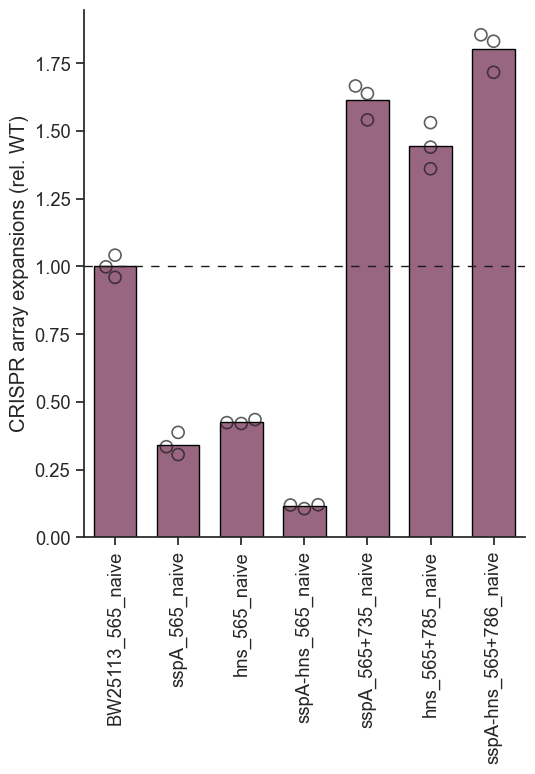

In [43]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="strain", y='rate', 
                data=fig5g_df, dodge = True,
                height= 6.27, aspect=1, kind="swarm", fc='none', 
                edgecolor='k',linewidth=1.2, s=75, alpha = 0.7,
                legend = False)

sns.barplot(x="strain", y='rate',
            data=fig5g_df,color = sns.color_palette("ch:s=-.2,r=.6", 10)[5], 
            edgecolor='black', width = 0.45, gap = -.5, errorbar=None)

g.set(xlabel='', ylabel='CRISPR array expansions (rel. WT)')

g.set_xticklabels(rotation=90)

plt.axhline(1, color = 'k', dashes = (6,6), lw = 1)

g.savefig("5g.pdf")

In [44]:
lm=ols.ols("rate ~ strain", fig5g_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,6.0,8.252566,1.375428,467.959279,2.641095e-15
Residual,14.0,0.041149,0.002939,NaN,NaN


In [45]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
hns_565+785_naive-BW25113_565_naive,0.443858,0.044266,10.027096,9.033393e-08,0.348917,0.538799,1.897011e-06,True
hns_565_naive-BW25113_565_naive,-0.573718,0.044266,-12.960720,3.459389e-09,-0.668659,-0.478777,7.264717e-08,True
sspA-hns_565+786_naive-BW25113_565_naive,0.800867,0.044266,18.092195,4.166433e-11,0.705926,0.895808,8.749510e-10,True
sspA-hns_565_naive-BW25113_565_naive,-0.884576,0.044266,-19.983231,1.087637e-11,-0.979516,-0.789635,2.284037e-10,True
sspA_565+735_naive-BW25113_565_naive,0.614994,0.044266,13.893184,1.396961e-09,0.520053,0.709935,2.933618e-08,True
sspA_565_naive-BW25113_565_naive,-0.657238,0.044266,-14.847499,5.825807e-10,-0.752179,-0.562297,1.223419e-08,True
hns_565_naive-hns_565+785_naive,-1.017576,0.044266,-22.987816,1.616311e-12,-1.112517,-0.922635,3.394253e-11,True
sspA-hns_565+786_naive-hns_565+785_naive,0.357009,0.044266,8.065100,1.246007e-06,0.262068,0.451950,2.616581e-05,True
sspA-hns_565_naive-hns_565+785_naive,-1.328434,0.044266,-30.010327,4.152103e-14,-1.423375,-1.233493,8.719416e-13,True
sspA_565+735_naive-hns_565+785_naive,0.171136,0.044266,3.866089,1.712377e-03,0.076195,0.266077,3.535077e-02,True


In [46]:
pw.result_frame.index

Index(['hns_565+785_naive-BW25113_565_naive',
       'hns_565_naive-BW25113_565_naive',
       'sspA-hns_565+786_naive-BW25113_565_naive',
       'sspA-hns_565_naive-BW25113_565_naive',
       'sspA_565+735_naive-BW25113_565_naive',
       'sspA_565_naive-BW25113_565_naive', 'hns_565_naive-hns_565+785_naive',
       'sspA-hns_565+786_naive-hns_565+785_naive',
       'sspA-hns_565_naive-hns_565+785_naive',
       'sspA_565+735_naive-hns_565+785_naive',
       'sspA_565_naive-hns_565+785_naive',
       'sspA-hns_565+786_naive-hns_565_naive',
       'sspA-hns_565_naive-hns_565_naive', 'sspA_565+735_naive-hns_565_naive',
       'sspA_565_naive-hns_565_naive',
       'sspA-hns_565_naive-sspA-hns_565+786_naive',
       'sspA_565+735_naive-sspA-hns_565+786_naive',
       'sspA_565_naive-sspA-hns_565+786_naive',
       'sspA_565+735_naive-sspA-hns_565_naive',
       'sspA_565_naive-sspA-hns_565_naive',
       'sspA_565_naive-sspA_565+735_naive'],
      dtype='object')

In [47]:
comparisons = ['hns_565+785_naive-BW25113_565_naive',
               'hns_565_naive-BW25113_565_naive',
               'sspA-hns_565+786_naive-BW25113_565_naive',
               'sspA-hns_565_naive-BW25113_565_naive',
               'sspA_565+735_naive-BW25113_565_naive',
               'sspA_565_naive-BW25113_565_naive',

               'sspA_565_naive-hns_565_naive',
               'sspA_565_naive-sspA-hns_565_naive',
               'sspA_565_naive-sspA_565+735_naive',

               'sspA-hns_565_naive-hns_565_naive',
               'hns_565_naive-hns_565+785_naive',
               'sspA_565+735_naive-hns_565+785_naive',
               'sspA-hns_565+786_naive-hns_565+785_naive',               
               'sspA-hns_565_naive-sspA-hns_565+786_naive',
               'sspA_565+735_naive-sspA-hns_565+786_naive',              
               ]

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
display(subdf)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
hns_565+785_naive-BW25113_565_naive,0.443858,0.044266,10.027096,9.033393e-08,0.348917,0.538799,1.897011e-06,True,0.000001
hns_565_naive-BW25113_565_naive,-0.573718,0.044266,-12.960720,3.459389e-09,-0.668659,-0.478777,7.264717e-08,True,0.000000
sspA-hns_565+786_naive-BW25113_565_naive,0.800867,0.044266,18.092195,4.166433e-11,0.705926,0.895808,8.749510e-10,True,0.000000
sspA-hns_565_naive-BW25113_565_naive,-0.884576,0.044266,-19.983231,1.087637e-11,-0.979516,-0.789635,2.284037e-10,True,0.000000
sspA_565+735_naive-BW25113_565_naive,0.614994,0.044266,13.893184,1.396961e-09,0.520053,0.709935,2.933618e-08,True,0.000000
sspA_565_naive-BW25113_565_naive,-0.657238,0.044266,-14.847499,5.825807e-10,-0.752179,-0.562297,1.223419e-08,True,0.000000
sspA_565_naive-hns_565_naive,-0.083520,0.044266,-1.886779,8.010276e-02,-0.178461,0.011421,8.268089e-01,False,0.714182
sspA_565_naive-sspA-hns_565_naive,0.227338,0.044266,5.135733,1.514090e-04,0.132397,0.322279,3.174780e-03,True,0.002269
sspA_565_naive-sspA_565+735_naive,-1.272232,0.044266,-28.740683,7.536364e-14,-1.367173,-1.177291,1.582637e-12,True,0.000000
sspA-hns_565_naive-hns_565_naive,-0.310858,0.044266,-7.022511,6.029489e-06,-0.405799,-0.215917,1.266116e-04,True,0.000090


### fig 5h

In [48]:
fig5h_df = pd.read_excel('data_for_stats_plt.xlsx', sheet_name='5h')
fig5h_df

,strain,rate
0,BW25113_565_naive,1.016660
1,BW25113_565_naive,1.060941
2,BW25113_565_naive,0.922398
3,sspA_565_naive,0.051027
4,sspA_565_naive,0.048936
5,sspA_565_naive,0.049201
6,hns_565_naive,0.335517
7,hns_565_naive,0.282277
8,hns_565_naive,0.241589
9,b75_565_naive,0.171434


In [49]:
data = []
for i in set(fig5h_df['strain']):
    print (i)
    data.append(fig5h_df[fig5h_df['strain']==i]['rate'])

b76_565_naive
sspA_565_naive
b75_565_naive
BW25113_565_naive
hns_565_naive


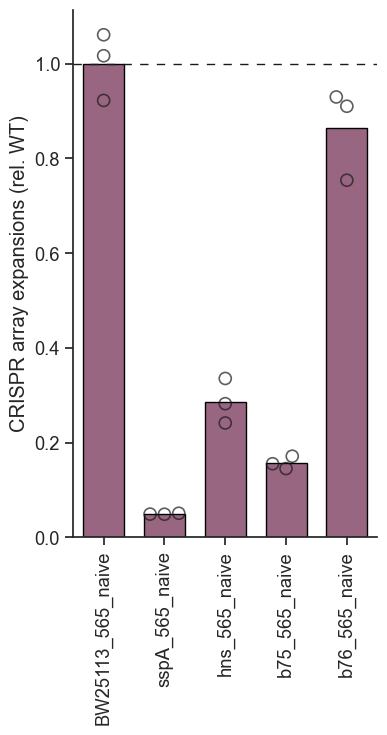

In [50]:
sns.set(font_scale = 1.2)
sns.set_style("ticks")

g = sns.catplot(x="strain", y='rate',
                data=fig5h_df, dodge = True, height= 6.27, aspect=0.70, 
                kind="swarm", fc='none', edgecolor='k',linewidth=1.2, s=75, alpha = 0.7,
                legend = False)

sns.barplot(x="strain", y='rate', 
            data=fig5h_df,color = sns.color_palette("ch:s=-.2,r=.6", 10)[5], 
            edgecolor='black', width = 0.45, gap = -.5, errorbar=None)

g.set(xlabel='', ylabel='CRISPR array expansions (rel. WT)')

g.set_xticklabels(rotation=90)

plt.axhline(1, color = 'k', dashes = (6,6), lw = 1)

g.savefig("5h.pdf")

In [51]:
lm=ols.ols("rate ~ strain", fig5h_df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
strain,4.0,2.233835,0.558459,167.464281,4.080438e-09
Residual,10.0,0.033348,0.003335,NaN,NaN


In [52]:
pw = lm.t_test_pairwise("strain",method="sidak")
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak
b75_565_naive-BW25113_565_naive,-0.842570,0.047151,-17.869688,6.434884e-09,-0.947628,-0.737511,6.434884e-08,True
b76_565_naive-BW25113_565_naive,-0.135406,0.047151,-2.871767,1.661834e-02,-0.240464,-0.030348,1.542908e-01,False
hns_565_naive-BW25113_565_naive,-0.713539,0.047151,-15.133133,3.211566e-08,-0.818597,-0.608480,3.211566e-07,True
sspA_565_naive-BW25113_565_naive,-0.950279,0.047151,-20.154049,1.990944e-09,-1.055337,-0.845220,1.990943e-08,True
b76_565_naive-b75_565_naive,0.707164,0.047151,14.997921,3.500951e-08,0.602105,0.812222,3.500951e-07,True
hns_565_naive-b75_565_naive,0.129031,0.047151,2.736555,2.095629e-02,0.023972,0.234089,1.908653e-01,False
sspA_565_naive-b75_565_naive,-0.107709,0.047151,-2.284361,4.544748e-02,-0.212768,-0.002651,3.719442e-01,False
hns_565_naive-b76_565_naive,-0.578133,0.047151,-12.261366,2.384953e-07,-0.683191,-0.473074,2.384950e-06,True
sspA_565_naive-b76_565_naive,-0.814873,0.047151,-17.282282,8.902743e-09,-0.919931,-0.709814,8.902742e-08,True
sspA_565_naive-hns_565_naive,-0.236740,0.047151,-5.020916,5.210372e-04,-0.341799,-0.131682,5.198173e-03,True


In [53]:
pw.result_frame.index

Index(['b75_565_naive-BW25113_565_naive', 'b76_565_naive-BW25113_565_naive',
       'hns_565_naive-BW25113_565_naive', 'sspA_565_naive-BW25113_565_naive',
       'b76_565_naive-b75_565_naive', 'hns_565_naive-b75_565_naive',
       'sspA_565_naive-b75_565_naive', 'hns_565_naive-b76_565_naive',
       'sspA_565_naive-b76_565_naive', 'sspA_565_naive-hns_565_naive'],
      dtype='object')

In [54]:
comparisons = ['b75_565_naive-BW25113_565_naive', 
               'b76_565_naive-BW25113_565_naive',
               'hns_565_naive-BW25113_565_naive', 
               'sspA_565_naive-BW25113_565_naive',
               'sspA_565_naive-hns_565_naive',          
               'sspA_565_naive-b75_565_naive', 
               'hns_565_naive-b76_565_naive',
               'b76_565_naive-b75_565_naive', 
               ]

subdf = pw.result_frame.loc[comparisons]
subdf['adj_p'] = multipletests(subdf['P>|t|'].values,method='sidak')[1].round(6)
display(subdf)

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-sidak,reject-sidak,adj_p
b75_565_naive-BW25113_565_naive,-0.842570,0.047151,-17.869688,6.434884e-09,-0.947628,-0.737511,6.434884e-08,True,0.000000
b76_565_naive-BW25113_565_naive,-0.135406,0.047151,-2.871767,1.661834e-02,-0.240464,-0.030348,1.542908e-01,False,0.125466
hns_565_naive-BW25113_565_naive,-0.713539,0.047151,-15.133133,3.211566e-08,-0.818597,-0.608480,3.211566e-07,True,0.000000
sspA_565_naive-BW25113_565_naive,-0.950279,0.047151,-20.154049,1.990944e-09,-1.055337,-0.845220,1.990943e-08,True,0.000000
sspA_565_naive-hns_565_naive,-0.236740,0.047151,-5.020916,5.210372e-04,-0.341799,-0.131682,5.198173e-03,True,0.004161
sspA_565_naive-b75_565_naive,-0.107709,0.047151,-2.284361,4.544748e-02,-0.212768,-0.002651,3.719442e-01,False,0.310715
hns_565_naive-b76_565_naive,-0.578133,0.047151,-12.261366,2.384953e-07,-0.683191,-0.473074,2.384950e-06,True,0.000002
b76_565_naive-b75_565_naive,0.707164,0.047151,14.997921,3.500951e-08,0.602105,0.812222,3.500951e-07,True,0.000000


_____________